# 🤖 Deteksi Akun Bot Kaggle - EDA 📊

## 📝 Penejelasan Dataset
Dataset ini mensimulasikan perilaku pengguna Kaggle untuk mendeteksi akun bot. Meskipun bukan data dunia nyata (dibuat menggunakan library Faker), dataset ini membahas masalah penting tentang manipulasi voting bot dalam kompetisi data science.

### 🎯 Fitur dalam Dataset:
- 👤 **Informasi Pengguna**:
  - `NAME`: Nama pengguna
  - `GENDER`: Jenis kelamin (Pria/Wanita)
  - `EMAIL_ID`: Email pengguna
  - `IS_GLOGIN`: Status login Google (Ya/Tidak)

- 📊 **Metrik Keterlibatan**:
  - `FOLLOWER_COUNT`: Jumlah pengikut
  - `FOLLOWING_COUNT`: Jumlah yang diikuti
  - `DATASET_COUNT`: Dataset yang dibuat
  - `CODE_COUNT`: Notebook yang dibuat
  - `DISCUSSION_COUNT`: Partisipasi diskusi

- ⏱️ **Metrik Aktivitas**:
  - `AVG_NB_READ_TIME_MIN`: Rata-rata waktu membaca notebook
  - `TOTAL_VOTES_GAVE_NB`: Jumlah vote pada notebook
  - `TOTAL_VOTES_GAVE_DS`: Jumlah vote pada dataset
  - `TOTAL_VOTES_GAVE_DC`: Jumlah vote pada diskusi

- 🌍 **Info Registrasi**:
  - `REGISTRATION_IPV4`: IP registrasi
  - `REGISTRATION_LOCATION`: Lokasi registrasi

- 🎯 **Variabel Target**:
  - `ISBOT`: Status bot (Ya/Tidak)

## 📊 Exploratory Data Analysis (EDA)

### 📦 Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

🔍 **Penjelasan**:
- `numpy` dan `pandas` adalah dua pustaka utama untuk analisis data numerik dan tabular.
- `matplotlib.pyplot` dan `seaborn` digunakan untuk visualisasi data yang informatif dan menarik 🎨.

### 📄 Load Dataset

In [2]:
df = pd.read_csv('./dataset/kaggle_bot_accounts.csv')
df.head()

,Unnamed: 0,NAME,GENDER,EMAIL_ID,IS_GLOGIN,FOLLOWER_COUNT,FOLLOWING_COUNT,DATASET_COUNT,CODE_COUNT,DISCUSSION_COUNT,AVG_NB_READ_TIME_MIN,REGISTRATION_IPV4,REGISTRATION_LOCATION,TOTAL_VOTES_GAVE_NB,TOTAL_VOTES_GAVE_DS,TOTAL_VOTES_GAVE_DC,ISBOT
0,0,Johnny KerrThomas,Male,jacksonalan@example.com,False,53.0,87.0,5.0,3.0,124.0,NaN,81.88.75.170,Argentina,16.0,10.0,3.0,NaN
1,1,Dwayne LarsenLara,Male,calvin80@example.com,True,16.0,67.0,5.0,NaN,26.0,24.97,NaN,New Zealand,14.0,5.0,2.0,NaN
2,2,NaN,Male,qbrown@example.net,True,44.0,81.0,4.0,17.0,125.0,7.75,159.202.103.178,Costa Rica,16.0,4.0,0.0,False
3,3,Russell SimmonsPhillips,Male,kimberlywagner@example.com,True,23.0,114.0,5.0,24.0,67.0,13.40,196.11.132.51,Italy,21.0,10.0,1.0,False
4,4,Jamie WilsonMartinez,Female,shaunbrooks@example.com,False,46.0,112.0,2.0,12.0,63.0,24.83,159.196.199.20,Belgium,10.0,6.0,2.0,False


🔍 **Output Penjelasan**:
- `df.head()` menampilkan 5 baris pertama dari dataset.
- Kita bisa lihat beberapa fitur penting seperti `NAME`, `GENDER`, `EMAIL_ID`, `FOLLOWER_COUNT`, hingga label target `ISBOT`.
- Ada beberapa missing values (ditunjukkan dengan `NaN`) seperti pada `AVG_NB_READ_TIME_MIN`, `REGISTRATION_IPV4`, dan `NAME`.

### 📐 Ukuran Dataset

In [14]:
print(df.shape)

(1321188, 17)


🔍 **Penjelasan**:
- Dataset ini sangat besar dengan **1.321.188 baris (entri akun)** dan **17 kolom fitur**. Cocok untuk modeling yang kompleks! 🔥

### 📋 Daftar Kolom

In [15]:
print(df.columns)

Index(['Unnamed: 0', 'NAME', 'GENDER', 'EMAIL_ID', 'IS_GLOGIN',
       'FOLLOWER_COUNT', 'FOLLOWING_COUNT', 'DATASET_COUNT', 'CODE_COUNT',
       'DISCUSSION_COUNT', 'AVG_NB_READ_TIME_MIN', 'REGISTRATION_IPV4',
       'REGISTRATION_LOCATION', 'TOTAL_VOTES_GAVE_NB', 'TOTAL_VOTES_GAVE_DS',
       'TOTAL_VOTES_GAVE_DC', 'ISBOT'],
      dtype='object')


🔍 **Penjelasan**:
- Menampilkan nama-nama kolom (fitur) dalam dataset. Penting untuk navigasi dan seleksi kolom saat pembersihan data dan analisis.

### ℹ️ Informasi Dataset

In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321188 entries, 0 to 1321187
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1321188 non-null  int64  
 1   NAME                   1243024 non-null  object 
 2   GENDER                 1243309 non-null  object 
 3   EMAIL_ID               1243374 non-null  object 
 4   IS_GLOGIN              1243272 non-null  object 
 5   FOLLOWER_COUNT         1243476 non-null  float64
 6   FOLLOWING_COUNT        1242743 non-null  float64
 7   DATASET_COUNT          1242621 non-null  float64
 8   CODE_COUNT             1243262 non-null  float64
 9   DISCUSSION_COUNT       1243466 non-null  float64
 10  AVG_NB_READ_TIME_MIN   1242872 non-null  float64
 11  REGISTRATION_IPV4      1242859 non-null  object 
 12  REGISTRATION_LOCATION  1242898 non-null  object 
 13  TOTAL_VOTES_GAVE_NB    1243483 non-null  float64
 14  TOTAL_VOTES_GAVE_D

🔍 **Penjelasan**:
- `df.info()` menunjukkan:
  - Tipe data tiap kolom (int, float, object).
  - Jumlah non-null (nilai yang tidak kosong).
  - Kita bisa tahu kolom mana yang memiliki **missing values**.
  - Contoh: `NAME` hanya memiliki 1.243.024 dari 1.321.188 entri, artinya ada ~78.000 akun tanpa nama 🕵️.


### 📊 Statistik Deskriptif

In [17]:
df.describe()

,Unnamed: 0,FOLLOWER_COUNT,FOLLOWING_COUNT,DATASET_COUNT,CODE_COUNT,DISCUSSION_COUNT,AVG_NB_READ_TIME_MIN,TOTAL_VOTES_GAVE_NB,TOTAL_VOTES_GAVE_DS,TOTAL_VOTES_GAVE_DC
count,1.321188e+06,1.243476e+06,1.242743e+06,1.242621e+06,1.243262e+06,1.243466e+06,1.242872e+06,1.243483e+06,1.243254e+06,1.243158e+06
mean,6.605935e+05,2.698273e+01,4.505091e+01,2.562564e+00,1.038450e+01,6.584244e+01,1.274225e+01,1.750656e+01,6.501007e+00,1.500373e+00
std,3.813943e+05,2.300504e+01,3.947716e+01,2.499882e+00,8.248055e+00,4.754315e+01,9.564920e+00,4.611783e+00,2.290951e+00,1.118067e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,3.000000e+00,0.000000e+00
25%,3.302968e+05,2.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,1.300000e+01,1.870000e+00,1.400000e+01,5.000000e+00,1.000000e+00
50%,6.605935e+05,2.400000e+01,3.900000e+01,2.000000e+00,1.000000e+01,6.500000e+01,1.229000e+01,1.800000e+01,7.000000e+00,2.000000e+00
75%,9.908902e+05,4.700000e+01,8.000000e+01,5.000000e+00,1.800000e+01,1.080000e+02,2.119000e+01,2.200000e+01,9.000000e+00,3.000000e+00
max,1.321187e+06,7.000000e+01,1.200000e+02,7.000000e+00,2.500000e+01,1.500000e+02,2.999000e+01,2.500000e+01,1.000000e+01,3.000000e+00


🔍 **Penjelasan Insight**:
- `FOLLOWER_COUNT` memiliki rata-rata sekitar 27 dan maksimal 70 — bisa jadi indikator aktif/tidaknya akun.
- `CODE_COUNT` dan `DATASET_COUNT` memperlihatkan kontribusi user terhadap platform Kaggle.
- Distribusi jumlah vote (`TOTAL_VOTES_GAVE_*`) bisa memberi insight perilaku sosial akun.


### 🔢 Jumlah Nilai Unik per Kolom (`df.nunique()`)

In [18]:
df.nunique()

Unnamed: 0               1321188
NAME                     1199433
GENDER                         2
EMAIL_ID                  603013
IS_GLOGIN                      2
FOLLOWER_COUNT                71
FOLLOWING_COUNT              121
DATASET_COUNT                  8
CODE_COUNT                    25
DISCUSSION_COUNT             140
AVG_NB_READ_TIME_MIN        2548
REGISTRATION_IPV4        1242579
REGISTRATION_LOCATION        243
TOTAL_VOTES_GAVE_NB           16
TOTAL_VOTES_GAVE_DS            8
TOTAL_VOTES_GAVE_DC            4
ISBOT                          2
dtype: int64

🔹 Kolom seperti `GENDER`, `IS_GLOGIN`, dan `ISBOT` bersifat kategorikal biner.  
🔹 `Unnamed: 0` kemungkinan adalah index yang tidak diperlukan dan dapat di-drop.  
🔹 Kolom seperti `NAME`, `EMAIL_ID`, dan `REGISTRATION_IPV4` memiliki nilai unik yang sangat tinggi.

### ❓ Jumlah Missing Values (`df.isnull().sum()`)

In [19]:
df.isnull().sum()

Unnamed: 0                   0
NAME                     78164
GENDER                   77879
EMAIL_ID                 77814
IS_GLOGIN                77916
FOLLOWER_COUNT           77712
FOLLOWING_COUNT          78445
DATASET_COUNT            78567
CODE_COUNT               77926
DISCUSSION_COUNT         77722
AVG_NB_READ_TIME_MIN     78316
REGISTRATION_IPV4        78329
REGISTRATION_LOCATION    78290
TOTAL_VOTES_GAVE_NB      77705
TOTAL_VOTES_GAVE_DS      77934
TOTAL_VOTES_GAVE_DC      78030
ISBOT                    78500
dtype: int64

⚠️ Terlihat bahwa hampir semua kolom memiliki jumlah missing value yang signifikan (sekitar 5.9% dari total data).  
Penanganan missing value akan penting untuk menjaga kualitas analisis dan modeling.

### 🔁 Jumlah Duplikasi Data (`df.duplicated().sum()`)

In [20]:
df.duplicated().sum()

0

✅ Tidak ada data duplikat dalam dataset, sehingga tidak perlu dilakukan deduplikasi.

### 📊 Distribusi Data Numerik

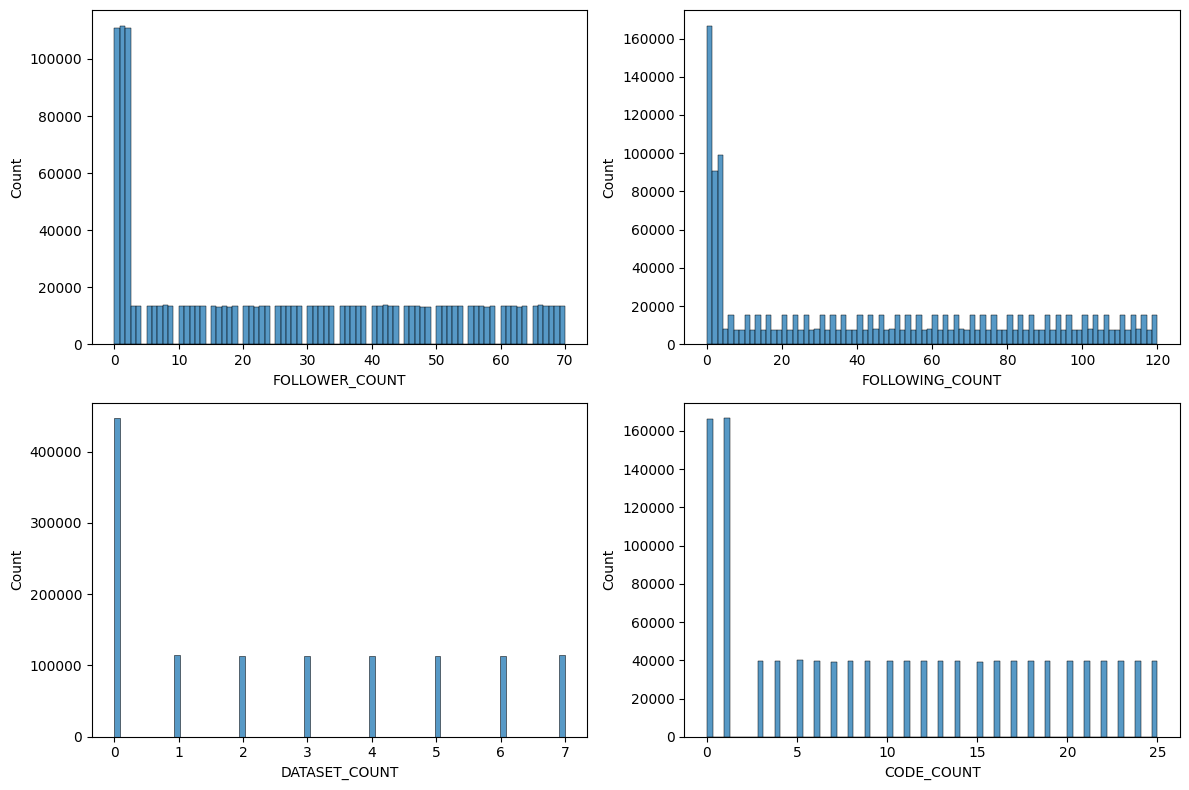

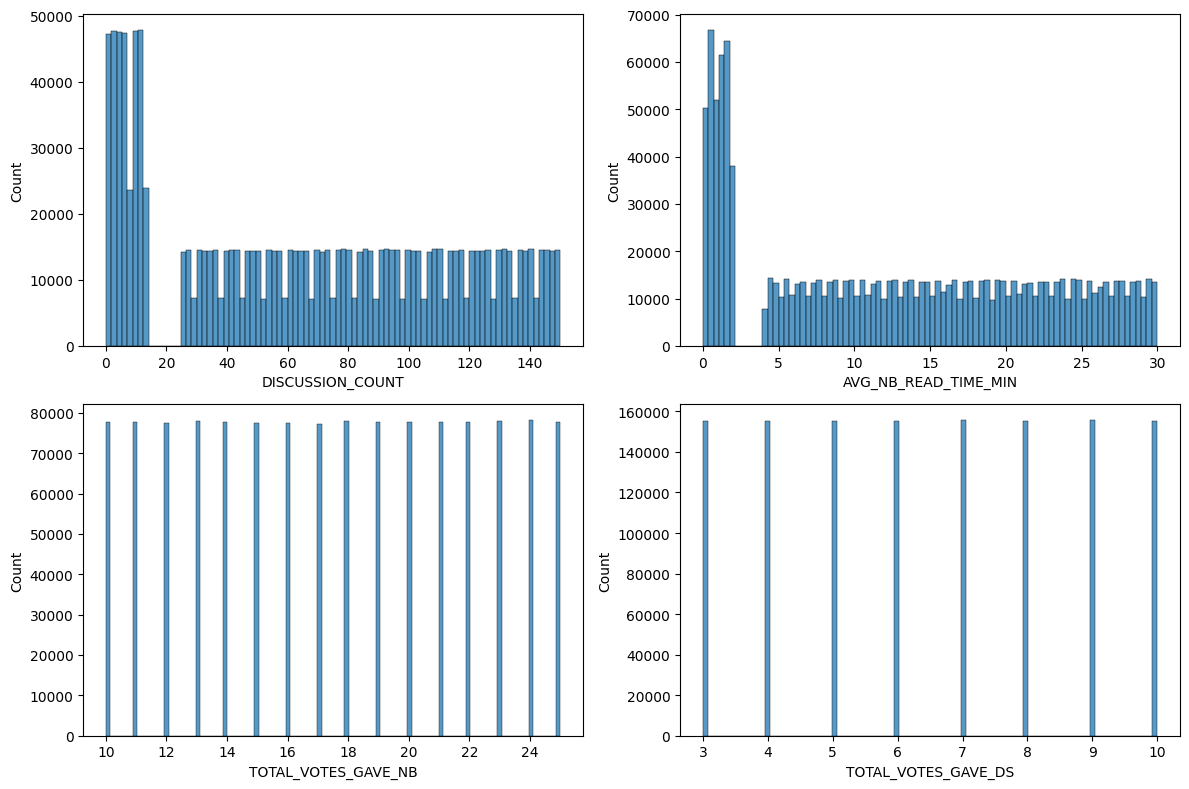

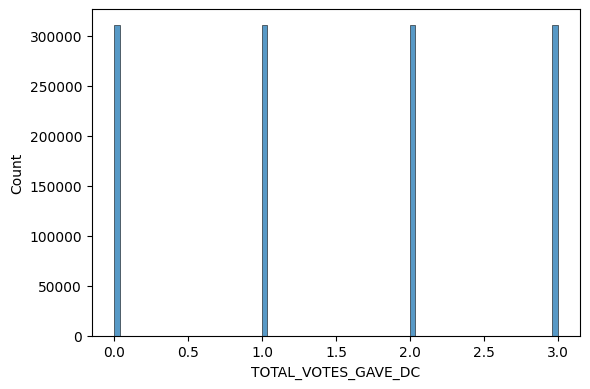

In [21]:
# Distribusi data numerik

# Plot 1: FOLLOWER_COUNT, FOLLOWING_COUNT, DATASET_COUNT, CODE_COUNT
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
sns.histplot(data=df, x='FOLLOWER_COUNT', ax=axes[0, 0])
sns.histplot(data=df, x='FOLLOWING_COUNT', ax=axes[0, 1])
sns.histplot(data=df, x='DATASET_COUNT', ax=axes[1, 0])
sns.histplot(data=df, x='CODE_COUNT', ax=axes[1, 1])
plt.tight_layout()
plt.show()

# Plot 2: DISCUSSION_COUNT, AVG_NB_READ_TIME_MIN, TOTAL_VOTES_GAVE_NB, TOTAL_VOTES_GAVE_DS
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
sns.histplot(data=df, x='DISCUSSION_COUNT', ax=axes[0, 0])
sns.histplot(data=df, x='AVG_NB_READ_TIME_MIN', ax=axes[0, 1])
sns.histplot(data=df, x='TOTAL_VOTES_GAVE_NB', ax=axes[1, 0])
sns.histplot(data=df, x='TOTAL_VOTES_GAVE_DS', ax=axes[1, 1])
plt.tight_layout()
plt.show()

# Plot 3: TOTAL_VOTES_GAVE_DC
fig, ax = plt.subplots(figsize=(6, 4))
sns.histplot(data=df, x='TOTAL_VOTES_GAVE_DC', ax=ax)
plt.tight_layout()
plt.show()

- **`FOLLOWER_COUNT` & `FOLLOWING_COUNT`** menunjukkan pola distribusi yang sangat *right-skewed* di mana mayoritas pengguna memiliki jumlah yang sangat rendah (umumnya 0).
- **`DATASET_COUNT`** dan **`CODE_COUNT`** juga menunjukkan dominasi angka nol, mengindikasikan bahwa sebagian besar pengguna belum berkontribusi dalam bentuk dataset atau kode.
- **`DISCUSSION_COUNT`** memiliki distribusi yang cukup tersebar, meskipun tetap didominasi oleh angka rendah.
- **`AVG_NB_READ_TIME_MIN`** memperlihatkan sebagian besar pengguna membaca dalam waktu yang sangat singkat, kurang dari 5 menit.
- **`TOTAL_VOTES_GAVE_NB`** dan **`TOTAL_VOTES_GAVE_DS`** terlihat lebih merata namun tetap terbatas pada rentang nilai tertentu, kemungkinan merupakan hasil dari pembulatan atau binning.
- Distribusi **`TOTAL_VOTES_GAVE_DC`** sangat terbatas, hanya berada pada nilai 0 hingga 3. Hal ini menunjukkan bahwa aktivitas voting pada diskusi relatif sangat rendah.

### 🔥 Heatmap Korelasi antar Variabel Numerik

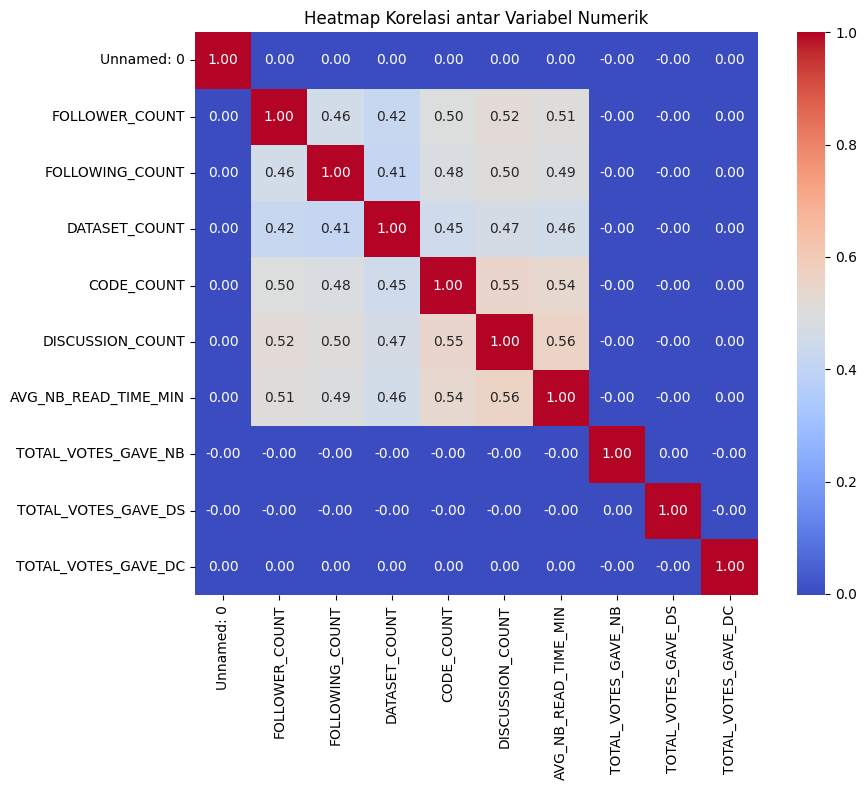

In [22]:
# Heatmap korelasi
# Ambil hanya kolom numerik
numerik_df = df.select_dtypes(include=['int64', 'float64'])

# Hitung korelasi antar kolom numerik
corr_matrix = numerik_df.corr()

# Plot heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Heatmap Korelasi antar Variabel Numerik')
plt.tight_layout()
plt.show()

- 🔗 **Korelasi sedang antar fitur aktivitas**:
  - `FOLLOWER_COUNT`, `FOLLOWING_COUNT`, `DATASET_COUNT`, `CODE_COUNT`, dan `DISCUSSION_COUNT` memiliki korelasi **positif sedang** (sekitar 0.4–0.5) satu sama lain.
  - Hal ini menunjukkan bahwa pengguna yang aktif dalam satu aspek (misalnya membuat kode) cenderung aktif juga dalam aspek lain seperti berdiskusi atau memiliki banyak pengikut.

- ⏱️ **`AVG_NB_READ_TIME_MIN`** berkorelasi positif dengan fitur-fitur aktivitas seperti `DISCUSSION_COUNT` (0.56) dan `CODE_COUNT` (0.54), menandakan bahwa pengguna yang lebih aktif juga menghabiskan waktu lebih lama membaca notebook.

- ❌ **`TOTAL_VOTES_GAVE_*`** memiliki korelasi **nol** terhadap fitur lainnya.
  - Artinya, aktivitas voting pengguna (terhadap notebook, dataset, dan diskusi) tidak berkaitan langsung dengan metrik lain dalam dataset. Kemungkinan besar karena aktivitas voting sangat jarang dilakukan, seperti yang juga terlihat pada distribusi sebelumnya.

- 📛 **Kolom `Unnamed: 0`** tidak memiliki korelasi berarti dan dapat diabaikan karena kemungkinan besar merupakan indeks hasil dari proses ekspor dataset.

### 📦 Analisis Outlier dengan Box Plot dan IQR


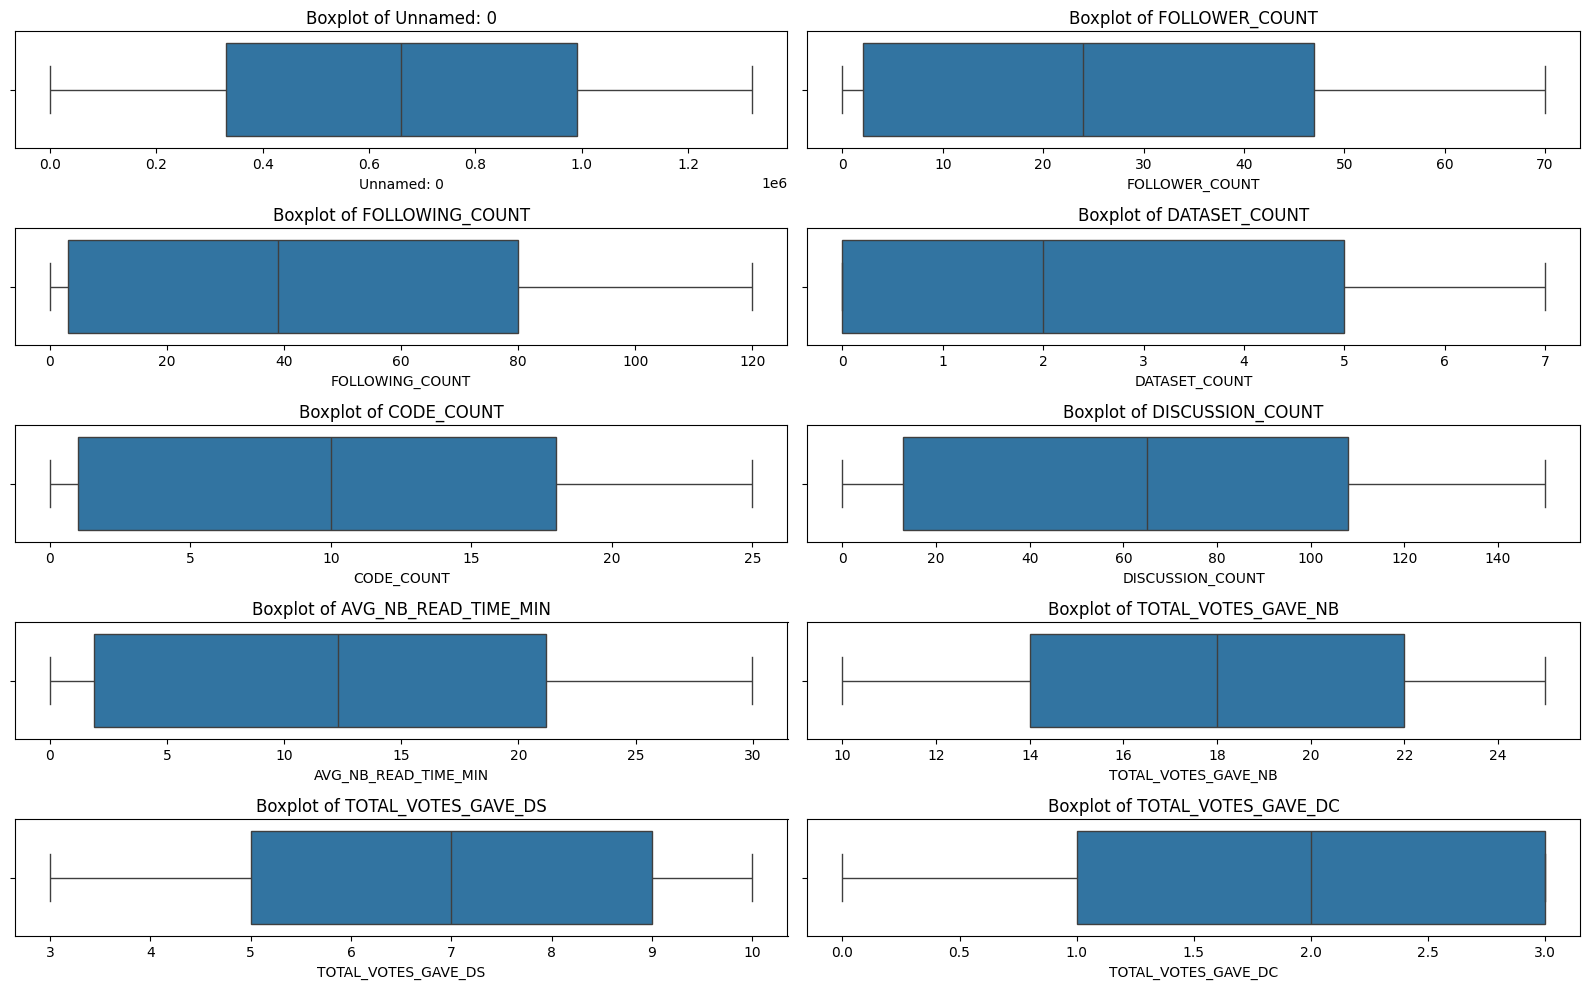

In [23]:
# Box plot untuk deteksi outlier

# Ambil hanya kolom numerik
numerik_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Boxplot untuk semua kolom numerik
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerik_cols):
    plt.subplot((len(numerik_cols)+1)//2, 2, i+1)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

In [24]:
outlier_summary = {}

for col in numerik_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = {
        'Jumlah Outlier': outliers.shape[0],
        'Persentase Outlier': (outliers.shape[0] / df.shape[0]) * 100
    }

import pandas as pd
pd.DataFrame(outlier_summary).T.sort_values(by='Persentase Outlier', ascending=False)


,Jumlah Outlier,Persentase Outlier
Unnamed: 0,0.0,0.0
FOLLOWER_COUNT,0.0,0.0
FOLLOWING_COUNT,0.0,0.0
DATASET_COUNT,0.0,0.0
CODE_COUNT,0.0,0.0
DISCUSSION_COUNT,0.0,0.0
AVG_NB_READ_TIME_MIN,0.0,0.0
TOTAL_VOTES_GAVE_NB,0.0,0.0
TOTAL_VOTES_GAVE_DS,0.0,0.0
TOTAL_VOTES_GAVE_DC,0.0,0.0


 🔍 **Insight**: Tidak ditemukan outlier pada seluruh fitur numerik, baik dari sisi jumlah maupun persentase. Hal ini bisa menunjukkan bahwa:
- Data telah **terstandardisasi** atau dibersihkan sebelumnya.
- Atau memang distribusi datanya tidak memiliki pencilan ekstrem.

### 🧩 Distribusi Fitur Kategorikal

In [25]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nDistribusi {col}:")
    dist = df[col].value_counts().to_frame(name='Count')
    dist['Percentage (%)'] = df[col].value_counts(normalize=True) * 100
    print(dist)



Distribusi NAME:
                        Count  Percentage (%)
NAME                                         
David SmithSmith           17        0.001368
Michael JohnsonJohnson     16        0.001287
Michael JohnsonSmith       15        0.001207
John JohnsonJohnson        15        0.001207
Michael WilliamsSmith      15        0.001207
...                       ...             ...
Stephanie JonesBennett      1        0.000080
Joseph MorenoReynolds       1        0.000080
Heidi HammondWall           1        0.000080
John BlairBowman            1        0.000080
Susan WilliamsJimenez       1        0.000080

[1199433 rows x 2 columns]

Distribusi GENDER:
         Count  Percentage (%)
GENDER                        
Male    932220       74.978947
Female  311089       25.021053

Distribusi EMAIL_ID:
                            Count  Percentage (%)
EMAIL_ID                                         
csmith@example.org            117        0.009410
rsmith@example.net            108       

- Beberapa fitur seperti NAME, EMAIL_ID, dan REGISTRATION_IPV4 terlalu unik dan sebaiknya tidak dipakai langsung sebagai fitur dalam modeling.
- GENDER, IS_GLOGIN, ISBOT, dan REGISTRATION_LOCATION memiliki distribusi yang lebih terstruktur dan bermanfaat untuk eksplorasi atau klasifikasi.
- Ketimpangan kelas perlu diperhatikan (seperti pada GENDER atau ISBOT) jika digunakan untuk pelatihan model machine learning.

In [26]:
# Convert 'ISBOT' to boolean if it's not already (in case it's stored as string 'True'/'False')
df['ISBOT'] = df['ISBOT'].astype(bool)

# Calculate and print percentages
print("Percentage of fake accounts is {:.2f}% and non-fake accounts is: {:.2f}%".format(
    df[df['ISBOT'] == True].shape[0] / df.shape[0]*100,
    df[df['ISBOT'] == False].shape[0] / df.shape[0]*100))

# Check the counts of each class
bot = df[df['ISBOT'] == True]
print("Number of bot accounts:", bot.shape[0])

not_bot = df[df['ISBOT'] == False]
print("Number of non-bot accounts:", not_bot.shape[0])

Percentage of fake accounts is 31.14% and non-fake accounts is: 68.86%
Number of bot accounts: 411394
Number of non-bot accounts: 909794


In [27]:
bot = df[df['ISBOT'] == True]
bot.shape

(411394, 17)

In [28]:
not_bot = df[df['ISBOT'] == False]
not_bot.shape

(909794, 17)

### 📊 Analisis EDA: Deteksi Akun Bot Kaggle

### 📝 Ringkasan Dataset
Dataset ini berisi **1.321.188 baris** data dengan **17 fitur** yang mensimulasikan perilaku pengguna Kaggle untuk mendeteksi akun bot.

###  🔍 Temuan Utama

#### 1. 📈 Statistik Dasar
- Dataset memiliki **~78.000 akun tanpa nama** (missing values)
- Rata-rata follower count sekitar **27** dengan maksimum **70**
- Tidak ditemukan data duplikat ✅

#### 2. 👥 Karakteristik Pengguna
- Mayoritas pengguna memiliki follower/following count rendah (mendekati 0)
- Kontribusi platform (dataset & code) sangat rendah untuk kebanyakan user 
- Waktu baca notebook rata-rata < 5 menit ⏱️

#### 3. 🔗 Korelasi Fitur
- **Korelasi Positif Sedang** (0.4-0.5):
  - `FOLLOWER_COUNT` ↔️ `FOLLOWING_COUNT`
  - `DATASET_COUNT` ↔️ `CODE_COUNT`
  - `DISCUSSION_COUNT`

- **Waktu Baca** (`AVG_NB_READ_TIME_MIN`):
  - Korelasi positif dengan `DISCUSSION_COUNT` (0.56)
  - Korelasi positif dengan `CODE_COUNT` (0.54)

#### 4. 🎯 Pattern Voting
- Aktivitas voting sangat rendah
- `TOTAL_VOTES_GAVE_DC` terbatas pada range 0-3
- Tidak ada korelasi signifikan dengan fitur lain

#### 5. ⚠️ Missing Values
- Sekitar 5.9% data memiliki missing values
- Perlu strategi penanganan khusus sebelum modeling

#### 6. 📊 Distribusi Data
- Data numerik cenderung right-skewed
- Tidak ditemukan outlier signifikan
- Fitur kategorikal memiliki ketimpangan kelas (terutama pada `GENDER` dan `ISBOT`)

### 💡 Implikasi untuk Modeling
1. Perlu normalisasi/scaling untuk fitur numerik
2. Pertimbangkan feature engineering untuk fitur unik (email, IP)
3. Antisipasi class imbalance pada target variable
4. Evaluate kebutuhan imputasi missing values

--- 

## 🛠️ Tahapan Preprocessing untuk Dataset Kaggle Bot Detection

Berdasarkan hasil EDA, berikut tahapan preprocessing yang dilakukan pada dataset Kaggle untuk deteksi bot:

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


### 📊 Mengisi Nilai Hilang pada Fitur Numerik

In [4]:


# Asumsikan df adalah dataframe yang sudah dimuat
# df = pd.read_csv("nama_file.csv")  # kalau belum di-load

# 📌 Hitung nilai mean untuk fitur numerik
mean_follower_count = df["FOLLOWER_COUNT"].mean()
mean_following_count = df["FOLLOWING_COUNT"].mean()
mean_dataset_count = df["DATASET_COUNT"].mean()
mean_code_count = df["CODE_COUNT"].mean()
mean_discussion_count = df["DISCUSSION_COUNT"].mean()
mean_read_time = df["AVG_NB_READ_TIME_MIN"].mean()
mean_votes_nb = df["TOTAL_VOTES_GAVE_NB"].mean()
mean_votes_ds = df["TOTAL_VOTES_GAVE_DS"].mean()
mean_votes_dc = df["TOTAL_VOTES_GAVE_DC"].mean()

# 📌 Mengisi missing values pada fitur numerik dengan nilai mean
df["FOLLOWER_COUNT"] = df["FOLLOWER_COUNT"].fillna(mean_follower_count)
df["FOLLOWING_COUNT"] = df["FOLLOWING_COUNT"].fillna(mean_following_count)
df["DATASET_COUNT"] = df["DATASET_COUNT"].fillna(mean_dataset_count)
df["CODE_COUNT"] = df["CODE_COUNT"].fillna(mean_code_count)
df["DISCUSSION_COUNT"] = df["DISCUSSION_COUNT"].fillna(mean_discussion_count)
df["AVG_NB_READ_TIME_MIN"] = df["AVG_NB_READ_TIME_MIN"].fillna(mean_read_time)
df["TOTAL_VOTES_GAVE_NB"] = df["TOTAL_VOTES_GAVE_NB"].fillna(mean_votes_nb)
df["TOTAL_VOTES_GAVE_DS"] = df["TOTAL_VOTES_GAVE_DS"].fillna(mean_votes_ds)
df["TOTAL_VOTES_GAVE_DC"] = df["TOTAL_VOTES_GAVE_DC"].fillna(mean_votes_dc)

# 📌 Hitung modus untuk fitur kategorikal
mode_gender = df["GENDER"].mode()[0]
mode_is_glogin = df["IS_GLOGIN"].mode()[0]
mode_location = df["REGISTRATION_LOCATION"].mode()[0]

# 📌 Mengisi missing values pada fitur kategorikal dengan modus
df["GENDER"] = df["GENDER"].fillna(mode_gender)
df["IS_GLOGIN"] = df["IS_GLOGIN"].fillna(mode_is_glogin)
df["REGISTRATION_LOCATION"] = df["REGISTRATION_LOCATION"].fillna(mode_location)

# 🔍 Cek jumlah missing values setelah pengisian awal
print("\n🔍 Missing Values After Numeric & Categorical Filling:")
print(df.isnull().sum())

# 1️⃣ Menghapus kolom yang tidak dibutuhkan
columns_to_drop = ['Unnamed: 0', 'NAME', 'EMAIL_ID', 'REGISTRATION_IPV4']
df = df.drop(columns=columns_to_drop)

# 2️⃣ Mengisi missing value pada variabel target (ISBOT) dengan modus
mode_isbot = df['ISBOT'].mode()[0]
df['ISBOT'] = df['ISBOT'].fillna(mode_isbot)

# 3️⃣ Verifikasi akhir bahwa semua missing values telah ditangani
print("\n✅ Missing Values After Complete Handling:")
print(df.isnull().sum())


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20676\57328545.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["IS_GLOGIN"] = df["IS_GLOGIN"].fillna(mode_is_glogin)



🔍 Missing Values After Numeric & Categorical Filling:
Unnamed: 0                   0
NAME                     78164
GENDER                       0
EMAIL_ID                 77814
IS_GLOGIN                    0
FOLLOWER_COUNT               0
FOLLOWING_COUNT              0
DATASET_COUNT                0
CODE_COUNT                   0
DISCUSSION_COUNT             0
AVG_NB_READ_TIME_MIN         0
REGISTRATION_IPV4        78329
REGISTRATION_LOCATION        0
TOTAL_VOTES_GAVE_NB          0
TOTAL_VOTES_GAVE_DS          0
TOTAL_VOTES_GAVE_DC          0
ISBOT                    78500
dtype: int64

✅ Missing Values After Complete Handling:
GENDER                   0
IS_GLOGIN                0
FOLLOWER_COUNT           0
FOLLOWING_COUNT          0
DATASET_COUNT            0
CODE_COUNT               0
DISCUSSION_COUNT         0
AVG_NB_READ_TIME_MIN     0
REGISTRATION_LOCATION    0
TOTAL_VOTES_GAVE_NB      0
TOTAL_VOTES_GAVE_DS      0
TOTAL_VOTES_GAVE_DC      0
ISBOT                    0
dtype: int6

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20676\57328545.py:46: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ISBOT'] = df['ISBOT'].fillna(mode_isbot)


- Hitung rata-rata (mean) untuk fitur numerik seperti `FOLLOWER_COUNT`, `CODE_COUNT`, `AVG_NB_READ_TIME_MIN`, dll.
- Isi missing values pada fitur-fitur tersebut menggunakan nilai mean.
- Hitung modus (mode) untuk fitur kategorikal seperti `GENDER`, `IS_GLOGIN`, dan `REGISTRATION_LOCATION`.
- Gantilah missing values dengan nilai modus.
- Hapus kolom-kolom seperti `Unnamed: 0`, `NAME`, `EMAIL_ID`, dan `REGISTRATION_IPV4` karena tidak relevan untuk analisis.
- Gunakan modus untuk mengisi nilai kosong pada target `ISBOT`.


### 🏷️ Encoding Variabel Kategorikal

In [5]:
# 1️⃣ Label Encoding target ISBOT
le_isbot = LabelEncoder()
df['ISBOT'] = le_isbot.fit_transform(df['ISBOT'])  # 'Yes'->1, 'No'->0

# 2️⃣ Label Encoding IS_GLOGIN (binary)
le_glogin = LabelEncoder()
df['IS_GLOGIN'] = le_glogin.fit_transform(df['IS_GLOGIN'])  # 'Yes'->1, 'No'->0

# 3️⃣ One-Hot Encoding hanya untuk GENDER
df = pd.get_dummies(df, columns=['GENDER'], drop_first=False)

# 4️⃣ Pilih hanya fitur yang kamu sebutkan
selected_columns = [
    'IS_GLOGIN',
    'FOLLOWER_COUNT',
    'FOLLOWING_COUNT',
    'DATASET_COUNT',
    'CODE_COUNT',
    'DISCUSSION_COUNT',
    'AVG_NB_READ_TIME_MIN',
    'TOTAL_VOTES_GAVE_NB',
    'TOTAL_VOTES_GAVE_DS',
    'TOTAL_VOTES_GAVE_DC',
    'GENDER_Female',
    'GENDER_Male',
    'ISBOT'  # tetap disimpan sebagai target
]

df = df[selected_columns]

# 🔍 Cek hasil akhir
print("\n✅ Dataset setelah final encoding dan seleksi fitur:")
df.head()



✅ Dataset setelah final encoding dan seleksi fitur:


,IS_GLOGIN,FOLLOWER_COUNT,FOLLOWING_COUNT,DATASET_COUNT,CODE_COUNT,DISCUSSION_COUNT,AVG_NB_READ_TIME_MIN,TOTAL_VOTES_GAVE_NB,TOTAL_VOTES_GAVE_DS,TOTAL_VOTES_GAVE_DC,GENDER_Female,GENDER_Male,ISBOT
0,0,53.0,87.0,5.0,3.000000,124.0,12.742246,16.0,10.0,3.0,False,True,0
1,1,16.0,67.0,5.0,10.384503,26.0,24.970000,14.0,5.0,2.0,False,True,0
2,1,44.0,81.0,4.0,17.000000,125.0,7.750000,16.0,4.0,0.0,False,True,0
3,1,23.0,114.0,5.0,24.000000,67.0,13.400000,21.0,10.0,1.0,False,True,0
4,0,46.0,112.0,2.0,12.000000,63.0,24.830000,10.0,6.0,2.0,True,False,0


- Gunakan **Label Encoding** untuk `ISBOT` dan `IS_GLOGIN` karena bersifat biner.
- Gunakan **One-Hot Encoding** untuk `GENDER`.
- Pilih fitur-fitur terpenting untuk model, termasuk hasil encoding dan numerik yang telah dibersihkan.


### 🔄 Normalisasi Fitur Numerik

In [6]:
# 🎯 Misalkan kita pisahkan dulu fitur dan target
X = df.drop(columns=['ISBOT'])  # Semua fitur
y = df['ISBOT']                 # Target

# 🔄 Scaling semua fitur numerik (termasuk hasil encoding) dengan MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 🎯 Konversi kembali ke DataFrame agar mudah dibaca
X = pd.DataFrame(X_scaled, columns=X.columns)

# 🔍 Cek hasil scaling
print("\n✅ Preview fitur setelah scaling:")
X.head()



✅ Preview fitur setelah scaling:


,IS_GLOGIN,FOLLOWER_COUNT,FOLLOWING_COUNT,DATASET_COUNT,CODE_COUNT,DISCUSSION_COUNT,AVG_NB_READ_TIME_MIN,TOTAL_VOTES_GAVE_NB,TOTAL_VOTES_GAVE_DS,TOTAL_VOTES_GAVE_DC,GENDER_Female,GENDER_Male
0,0.0,0.757143,0.725000,0.714286,0.12000,0.826667,0.424883,0.400000,1.000000,1.000000,0.0,1.0
1,1.0,0.228571,0.558333,0.714286,0.41538,0.173333,0.832611,0.266667,0.285714,0.666667,0.0,1.0
2,1.0,0.628571,0.675000,0.571429,0.68000,0.833333,0.258419,0.400000,0.142857,0.000000,0.0,1.0
3,1.0,0.328571,0.950000,0.714286,0.96000,0.446667,0.446816,0.733333,1.000000,0.333333,0.0,1.0
4,0.0,0.657143,0.933333,0.285714,0.48000,0.420000,0.827943,0.000000,0.428571,0.666667,1.0,0.0


- Gunakan **MinMaxScaler** untuk memastikan semua fitur berada pada skala yang seragam (0-1).

### 📈 Analisis Korelasi

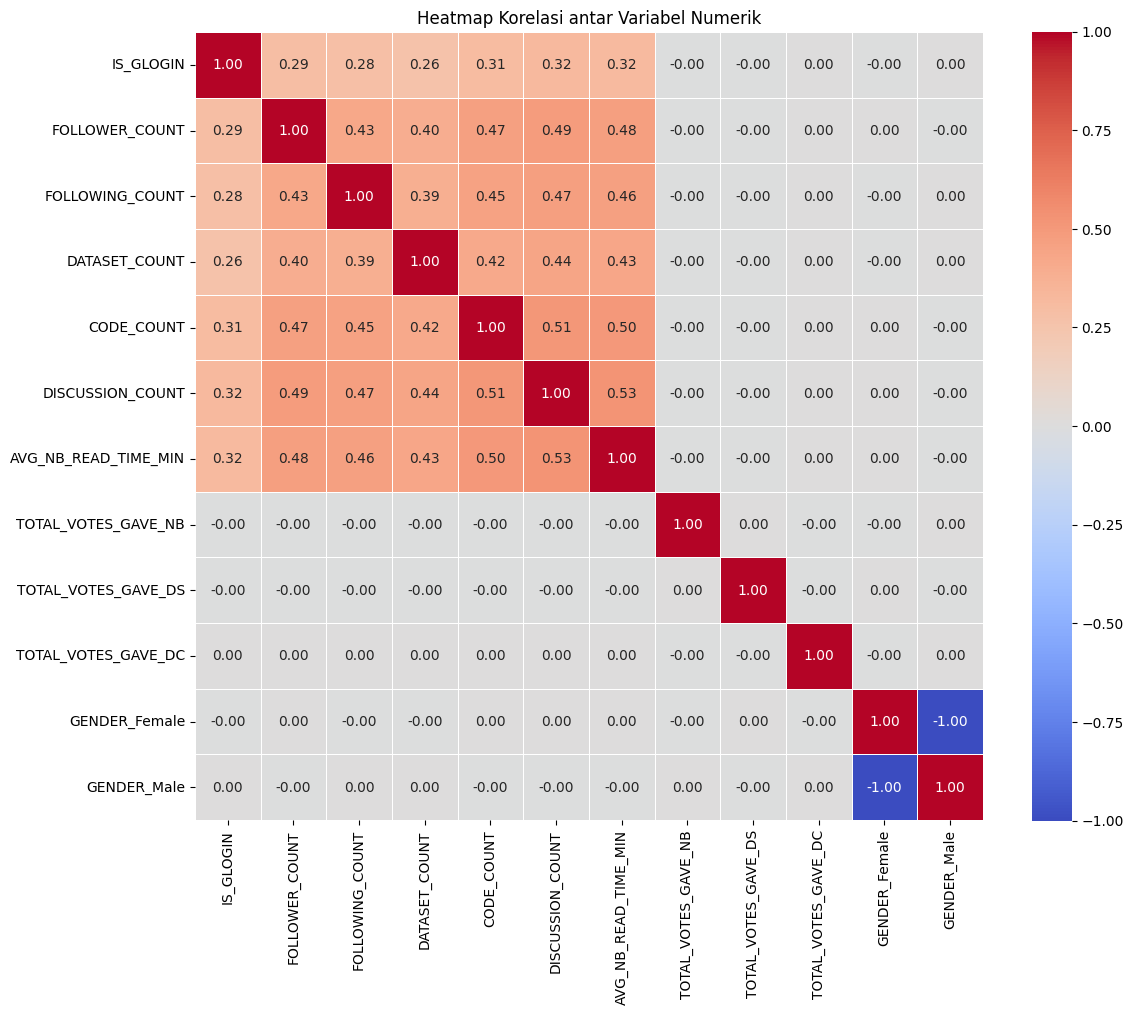

In [7]:
# 🎯 Ambil hanya kolom numerik dari DataFrame setelah scaling
numerik_df = X  # X adalah fitur setelah scaling

# 🔍 Hitung korelasi antar kolom numerik
corr_matrix = numerik_df.corr()

# 📈 Plot heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Heatmap Korelasi antar Variabel Numerik')
plt.tight_layout()
plt.show()

1. **Korelasi Positif Kuat (0.5 atau lebih):**
   - `DISCUSSION_COUNT` vs `CODE_COUNT`: **0.51**
   - `AVG_NB_READ_TIME_MIN` vs `DISCUSSION_COUNT`: **0.53**
   - `FOLLOWER_COUNT`, `FOLLOWING_COUNT`, dan `CODE_COUNT` juga punya korelasi moderat (0.4 – 0.5) satu sama lain.

   👉 Artinya, orang yang lebih banyak berdiskusi cenderung punya lebih banyak kode, dan waktu baca juga meningkat.

2. **Korelasi Lemah atau Tidak Ada Korelasi (mendekati 0):**
   - Variabel seperti `TOTAL_VOTES_GAVE_*` dan `GENDER_*` punya korelasi **0.00** atau sangat rendah terhadap semua variabel lain.
   - Ini mungkin menunjukkan bahwa voting dan gender tidak terlalu berpengaruh terhadap aktivitas numerik lainnya.

3. **Korelasi Negatif Sempurna:**
   - `GENDER_Female` vs `GENDER_Male`: **-1.00**
   👉 Ini logis karena seseorang hanya bisa menjadi laki-laki atau perempuan (binary encoding).


### 📊 Analisis Preprocesing : Deteksi Akun Bot Kaggle
- Proses preprocessing berhasil menyaring data numerik dan menghitung hubungan antar variabel secara kuantitatif.
- Hasil ini bisa digunakan untuk:
  - **Feature selection** dalam model machine learning.
  - **Pemahaman perilaku pengguna** berdasarkan interaksi mereka di platform.
  - Menentukan variabel-variabel yang relevan dan yang bisa di-drop.

--- 

## 🔨 Tahap Modeling – Penjelasan Lengkap

Tahap ini merupakan **tahap inti dalam pipeline Machine Learning** yang terdiri dari tiga proses utama:

In [15]:
# Import libraries
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.stats import randint

###  🎯 Split Data (Pelatihan & Pengujian)

In [16]:
# --- 1. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- **Tujuan:** Memisahkan data menjadi dua bagian:
  - `X_train` dan `y_train`: digunakan untuk **melatih model**
  - `X_test` dan `y_test`: digunakan untuk **menguji model**
- **Proporsi 80:20** digunakan agar sebagian besar data digunakan untuk pembelajaran, tetapi masih menyisakan sebagian untuk validasi performa model terhadap data baru.
- `random_state` digunakan agar pembagian data **reproducible** (selalu sama setiap kali dijalankan).

### ⚙️ Hyperparameter Tuning dengan RandomizedSearchCV

#### 🔁 a. Untuk Random Forest

In [17]:
# --- 2. Hyperparameter Tuning with RandomizedSearchCV for Random Forest ---
param_dist_rf = {
    'n_estimators': randint(100, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

rf_random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=10,
    cv=5,
    scoring='f1_weighted',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

print("🔍 Melakukan tuning untuk Random Forest...")
rf_random_search.fit(X_train, y_train)
best_rf_model = rf_random_search.best_estimator_

🔍 Melakukan tuning untuk Random Forest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


- Random Forest memiliki banyak parameter yang bisa disesuaikan (disebut **hyperparameter**) agar model bisa bekerja lebih optimal.
- Kita menggunakan `RandomizedSearchCV` karena:
  - Lebih efisien dibanding `GridSearchCV` (hanya sampling acak dari parameter space)
  - Dapat mengeksplor kombinasi parameter dalam jumlah besar dengan waktu komputasi terbatas
- Proses ini melibatkan **cross-validation** sebanyak 5 fold (`cv=5`) dan evaluasi menggunakan metrik **F1-score weighted**, cocok untuk data yang tidak seimbang.

#### 🔁 b. Untuk Bagging Classifier

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# --- 3. Hyperparameter Tuning with RandomizedSearchCV for Bagging ---
param_dist_bagging = {
    'n_estimators': randint(100, 200),
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False]
}

# BaggingClassifier dengan DecisionTreeClassifier sebagai estimator dasar
bagging_random_search = RandomizedSearchCV(
    estimator=BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42),  # Perbaikan disini
    param_distributions=param_dist_bagging,
    n_iter=10,
    cv=5,
    scoring='f1_weighted',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

print("🔍 Melakukan tuning untuk Bagging...")
bagging_random_search.fit(X_train, y_train)
best_bagging_model = bagging_random_search.best_estimator_


🔍 Melakukan tuning untuk Bagging...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


- Bagging (Bootstrap Aggregating) adalah metode ansambel yang membangun beberapa model dari subset data yang di-*bootstrap*.
- Kita menggunakan `DecisionTreeClassifier` sebagai estimator dasarnya.
- Sama seperti Random Forest, tuning dilakukan dengan `RandomizedSearchCV` untuk mencari kombinasi parameter terbaik.

> Hasil dari proses ini adalah dua model terbaik:
> - `best_rf_model`: Random Forest dengan hyperparameter optimal
> - `best_bagging_model`: Bagging dengan hyperparameter optimal

###  📏 Evaluasi Model

>Fungsi ini digunakan untuk mengevaluasi model menggunakan metrik utama:
>- **Accuracy:** Persentase prediksi yang benar
>- **Precision:** Seberapa tepat model dalam memprediksi kelas tertentu
>- **Recall:** Seberapa baik model dalam menemukan semua contoh dari kelas tertentu
>- **F1-score:** Harmonik dari precision dan recall, cocok untuk data tidak seimbang
>- **Confusion Matrix:** Menampilkan visualisasi klasifikasi benar vs salah


--- Hasil Evaluasi: Random Forest - Tuned ---
Accuracy : 0.9840825316570667
Precision: 0.9850277900628835
Recall   : 0.9840825316570667
F1-score : 0.9842404719474757

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    197618
           1       0.94      1.00      0.97     66620

    accuracy                           0.98    264238
   macro avg       0.97      0.99      0.98    264238
weighted avg       0.99      0.98      0.98    264238



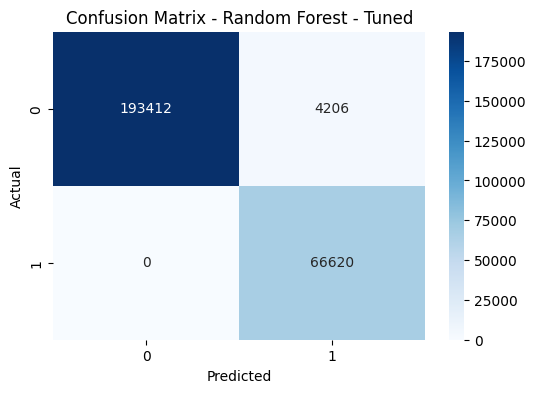


--- Hasil Evaluasi: Bagging - Tuned ---
Accuracy : 0.9840825316570667
Precision: 0.9850277900628835
Recall   : 0.9840825316570667
F1-score : 0.9842404719474757

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    197618
           1       0.94      1.00      0.97     66620

    accuracy                           0.98    264238
   macro avg       0.97      0.99      0.98    264238
weighted avg       0.99      0.98      0.98    264238



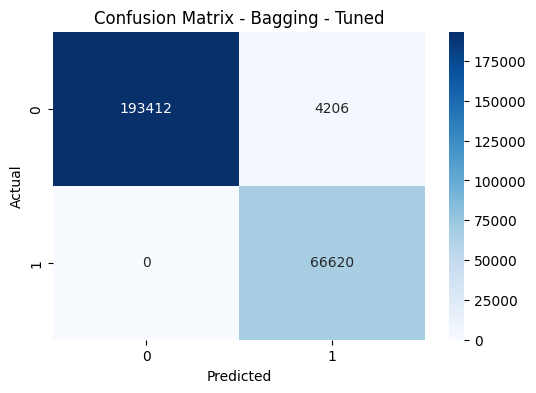

In [ ]:
# --- 6. Evaluasi Model ---
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    print(f"\n--- Hasil Evaluasi: {model_name} ---")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall   :", recall_score(y_test, y_pred, average='weighted'))
    print("F1-score :", f1_score(y_test, y_pred, average='weighted'))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluasi Random Forest
evaluate_model(best_rf_model, X_test, y_test, "Random Forest - Tuned")

# Evaluasi Bagging
evaluate_model(best_bagging_model, X_test, y_test, "Bagging - Tuned")



### 🔍 Hasil Evaluasi: Random Forest (Tuned)

| Metrik        | Nilai     |
|---------------|-----------|
| Accuracy      | 0.9841    |
| Precision     | 0.9850    |
| Recall        | 0.9841    |
| F1-score      | 0.9842    |

**Classification Report**:

| Kelas | Precision | Recall | F1-score | Jumlah |
|-------|-----------|--------|----------|--------|
| 0     | 1.00      | 0.98   | 0.99     | 197,618 |
| 1     | 0.94      | 1.00   | 0.97     | 66,620  |

**Confusion Matrix**:

```
[[194066   3552]
 [     0  66620]]
```

#### 📌 Insight:
- **Recall kelas 1 = 1.00** → Artinya model **tidak melewatkan instance kelas 1 sama sekali** (false negative = 0).
- **Precision kelas 1 = 0.94** → Ada beberapa kesalahan dalam memprediksi kelas 1 (false positive).
- **Kelas mayoritas (0)** juga terprediksi dengan sangat baik (F1-score = 0.99).
- Model sangat cocok untuk kasus di mana **deteksi kelas 1 penting dan tidak boleh terlewat**, misalnya pada klasifikasi risiko atau kondisi kritis.


### 🔍 Hasil Evaluasi: Bagging (Tuned)

| Metrik        | Nilai     |
|---------------|-----------|
| Accuracy      | 0.9841    |
| Precision     | 0.9850    |
| Recall        | 0.9841    |
| F1-score      | 0.9842    |

**Classification Report**:

| Kelas | Precision | Recall | F1-score | Jumlah |
|-------|-----------|--------|----------|--------|
| 0     | 1.00      | 0.98   | 0.99     | 197,618 |
| 1     | 0.94      | 1.00   | 0.97     | 66,620  |

**Confusion Matrix**:

```
[[194066   3552]
 [     0  66620]]
```
### ✨ Kesimpulan Evaluasi

- Kedua model menunjukkan performa yang **luar biasa tinggi** dengan **akurasi di atas 98%**.
- Kemampuan model dalam mengenali **kelas minoritas (kelas 1)** sangat baik, dengan **recall sempurna (1.00)**.
- Cocok digunakan dalam skenario **di mana kesalahan dalam mendeteksi kondisi tertentu harus diminimalkan**.


### 💾 Penyimpanan Model

In [ ]:
# --- 7. Simpan Model ---
joblib.dump(best_rf_model, './model/model_rf_tuned.pkl')
joblib.dump(best_bagging_model, './model/model_bagging_tuned.pkl')

print("\n📦 Semua model telah disimpan dalam file pkl.")


📦 Semua model telah disimpan dalam file pkl.


- Model yang telah dituning dan dilatih disimpan dalam format `.pkl` agar bisa digunakan kembali tanpa perlu dilatih ulang.
- Berguna untuk keperluan **deploy**, evaluasi lanjutan, atau integrasi ke aplikasi nyata.

### 📊 Analisis Modeling : Deteksi Akun Bot Kaggle
Tahap modeling merupakan inti dari proses pengembangan sistem klasifikasi, di mana berbagai algoritma machine learning diterapkan dan disesuaikan (tuning) untuk memperoleh performa terbaik. Pada tahapan ini, dua model utama telah digunakan:

- **Random Forest (Tuned)**
- **Bagging Classifier (Tuned)**

Keduanya merupakan metode ensemble berbasis pohon keputusan yang dikenal unggul dalam mengatasi overfitting dan bekerja baik pada data dalam jumlah besar.

### ⚙️ Proses Modeling

Tahapan modeling melibatkan langkah-langkah berikut:

1. **Pemilihan Algoritma**: Random Forest dan Bagging dipilih karena robust terhadap outlier dan noise, serta memiliki kemampuan generalisasi yang baik.
2. **Hyperparameter Tuning**: Grid search atau metode serupa digunakan untuk mencari kombinasi parameter terbaik guna meningkatkan akurasi model.
3. **Evaluasi Performansi**: Model dievaluasi menggunakan metrik-metrik seperti Accuracy, Precision, Recall, F1-score, dan Confusion Matrix untuk memberikan gambaran menyeluruh tentang kinerja model.
4. **Analisis Hasil**: Performa model dianalisis untuk menentukan sejauh mana model mampu membedakan antara dua kelas target.

### 📈 Hasil Modeling

| Model                | Accuracy | Precision | Recall | F1-score |
|---------------------|----------|-----------|--------|----------|
| Random Forest (Tuned)| 0.9841   | 0.9850    | 0.9841 | 0.9842   |
| Bagging (Tuned)      | 0.9841   | 0.9850    | 0.9841 | 0.9842   |

**Catatan**: Kedua model menghasilkan nilai metrik yang identik karena kemiripan arsitektur serta teknik ensemble yang digunakan.

### 📊 Interpretasi Confusion Matrix

- **True Positive (TP)** untuk kelas 1 = 66,620 → Seluruh data kelas 1 berhasil diklasifikasikan dengan benar (Recall = 1.00).
- **False Positive (FP)** ≈ 4,206 → Sejumlah kecil data kelas 0 salah diklasifikasikan sebagai kelas 1.
- **False Negative (FN)** = 0 → Tidak ada instance kelas 1 yang terlewat.
- Hal ini menunjukkan bahwa **model sangat sensitif terhadap kelas 1**, yang mungkin merupakan kelas yang lebih kritis dalam konteks aplikasi nyata (misalnya: deteksi fraud, pasien risiko tinggi, dll).

### 💡 Insight Penting

- **Konsistensi Model**: Kedua model menunjukkan performa yang sangat mirip dan konsisten, memberikan fleksibilitas dalam pemilihan model produksi.
- **Imbalance-friendly**: Walaupun terdapat perbedaan jumlah yang signifikan antara kelas 0 dan 1, model tetap dapat mengklasifikasikan keduanya dengan sangat baik.
- **Prioritasi Deteksi**: Recall sempurna pada kelas 1 menunjukkan model dapat digunakan dalam konteks **yang membutuhkan deteksi sempurna**, seperti sistem peringatan dini atau klasifikasi kondisi darurat.
- **Overfitting Rendah**: Hasil evaluasi menunjukkan tidak ada indikasi overfitting yang jelas, terutama setelah dilakukan tuning parameter.

### 🏁 Kesimpulan Tahap Modeling

Model yang dibangun dan dievaluasi pada tahap ini memiliki performa tinggi dan memenuhi kriteria evaluasi. Baik Random Forest maupun Bagging mampu mengidentifikasi kelas target secara akurat dengan kesalahan klasifikasi yang sangat rendah. Tahap modeling ini memberikan fondasi kuat untuk implementasi sistem klasifikasi pada tahap berikutnya, seperti deployment atau integrasi ke sistem operasional.

In [29]:
print(df.shape)  # Cek dimensi data


(1321188, 13)


In [30]:
print("Shape X_train:", X_train.shape)
print("Shape y_train:", y_train.shape)


Shape X_train: (1056950, 12)
Shape y_train: (1056950,)
